# Linear Regression

## **Problem**
Given the *training dataset* $x_i\in\mathbb{R}$, $y_i\in\mathbb{R}$, $i= 1,2,..., N$, we want to find the linear function 

$$ y\approx f(x) = wx + b $$ 

that fits the relations between $x_i$ and $y_i$. So that given any new $x^{test}$ in the **test** dataset, we can make the prediction 

$$ y^{pred} = w x^{test}+b $$

## Training the model

- With the training dataset, define the loss function $L(w,b)$ of parameter $w$ and $b$, which is also called **mean squared error** (MSE) 

$$L(w,b)=\frac{1}{N}\sum_{i=1}^N\big(\hat{y}^{(i)}-y_i\big)^2=\frac{1}{N}\sum_{i=1}^N\big((wx_i+b)-y_i\big)^2,$$

where $\hat{y}^{(i)}$ denotes the predicted value of y at $x_i$, i.e. $\hat{y}^{(i)} = wx_i+b$.


- Then find the minimum of loss function -- note that this is the quadratic function of $w$ and $b$, and we can analytically solve $\partial_{w}L = \partial_{b}L =0$, and yields

$$w^* = \frac{\sum_{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{N} (x_i - \bar{x})^2} = \frac{\text{Cov}(X,Y)}{\text{Var}(X)}$$


$$b^* = \bar{y}  - w^*\bar{x}$$

where $\bar{x}$ and $\bar{y}$ are the mean of $x$ and of $y$, and $\text{Cov}(X,Y)$ denotes the estimated covariance (or called sample covariance) between $X$ and $Y$, $\text{Var}(Y)$ denotes the sample variance of $Y$.

## Evaluating the model

- MSE: The smaller MSE indicates better performance
- R-Squared: The larger $R^{2}$ (closer to 1) indicates better performance. Compared with MSE, R-squared is **dimensionless**, not dependent on the units of variable. 

$$R^{2} = 1 - \frac{\sum_{i=1}^{N}(y_i-\hat{y}^{(i)})^{2}}{\sum_{i=1}^{N}(y_i-\bar{y})^{2}} = 1 - \frac{\frac{1}{N}\sum_{i=1}^{N}(y_i-\hat{y}^{(i)})^{2}}{\frac{1}{N}\sum_{i=1}^{N}(y_i-\bar{y})^{2}} = 1 - \frac{\text{MSE}}{\text{Var}(Y)}$$

Intuitively, MSE is the "unexplained" variance, and $R^{2}$ is the proportion of the variance that is explained by the model: if we are not using any model, then our best prediction is the mean of $y$, and MSE is the variance of $y$, and $R^{2}$ is 0; 
If our model is perfect, then MSE is 0, and $R^{2}$ is 1.





In [3]:
import numpy as np
import matplotlib.pyplot as plt

class myLinearRegression:
    '''
    The single-variable linear regression estimator
    '''
    def __init__(self, x, y):
        '''
        Determine the optimal parameters w, b for the input data x and y
        
        Parameters
        ----------
           x : 1D numpy array with shape (n_samples,) from training data
           y : 1D numpy array with shape (n_samples,) from training data
        
        Returns
        -------
        self : returns an instance of self, with new attributes slope w (float) and intercept b (float)
        '''
         # covariance matrix, bias = True makes the factor is 1/N -- but it doesn't matter actually, since the factor will be cancelled
        cov_mat = np.cov(x, y,bias=True)
        # cov_mat[0, 1] is the covariance of x and y, and cov_mat[0, 0] is the variance of x
        self.w = cov_mat[0, 1] / cov_mat[0, 0]
        self.b = np.mean(y) - self.w * np.mean(x)

        self.x_train = x
        self.y_train = y

        # :.3f means 3 decimal places
        print(f'w = {self.w:.3f}, b = {self.b:.3f}')

    
    def predict(self, x):
        '''
        Predict the output values for the input value x, based on trained parameters
        
        Parameters
        ----------
           x : 1D numpy array from training or test data 
        
        Returns
        -------
        returns 1D numpy array of same shape as input, the predicted y value of corresponding x
        '''
        ypred = self.w * x + self.b
        return ypred

    def score(self, x, y):
        '''
        Calculate the R^2 score of the model
        
        Parameters
        ----------
           x : 1D numpy array from training or test data 
           y : 1D numpy array from training or test data 
        
        Returns
        -------
        returns the R^2 score of the model
        '''
        mse =  np.sum((y - self.predict(x))**2)
        var = np.sum((y - np.mean(y))**2)
        Rsquare = 1 - mse / var
        return Rsquare

w = 1.997, b = 1.022


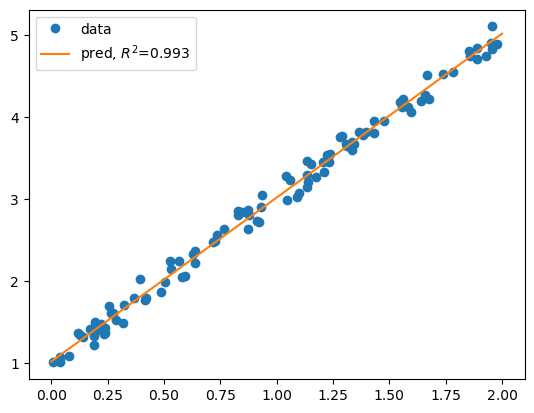

In [4]:
# Generate synthetic data

np.random.seed(0) # for reproducibility

a = 0
b = 2
N = 100

x = np.random.uniform(a,b,N)
y = 2 * x + 1 + 0.1*np.random.randn(N)


# Fit the model
lm = myLinearRegression(x, y)
score = lm.score(x, y)


# plot data
plt.plot(x, y, 'o', label='data')

# plot the linear regression model
xs = np.linspace(a, b, 100)
plt.plot(xs, lm.predict(xs), label=f'pred, $R^2$={score:.3f}')
plt.legend()




In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# x need to be n-sample by p features
reg.fit(x.reshape(-1, 1), y)
print(f'w = {reg.coef_[0]:.3f}, b = {reg.intercept_:.3f}')

score = reg.score(x.reshape(-1, 1), y)
print(f'score = {score:.3f}')

w = 1.997, b = 1.022
score = 0.993


## What is the effect of centering the data?

When $X$ is centered, the slope $w$ remains the same, but the intercept $b$ changes.

The intercept now means the predicted Y when X is at the mean.

In [6]:
x_center = x - np.mean(x)

reg.fit(x_center.reshape(-1, 1), y)
print(f'w = {reg.coef_[0]:.3f}, b = {reg.intercept_:.3f}')

w = 1.997, b = 2.910


When Y is centered, then the intercept $b$ is 0, and the slope $w$ is the correlation between $X$ and $Y$.

In [7]:

y_center = y - np.mean(y)
reg.fit(x_center.reshape(-1, 1), y_center)
print(f'w = {reg.coef_[0]:.3f}, b = {reg.intercept_:.3f}')

w = 1.997, b = -0.000


## What is the effect of scaling the data?

When $X/c$ is used, the optimal slope is now $c w$, and the intercept does not change

In [8]:
# suppose we want to scale x to [0, 1]
scale_factor = np.max(x)
x_scale = x / scale_factor
reg.fit(x_scale.reshape(-1, 1), y)
print(f'w = {reg.coef_[0]:.3f}, b = {reg.intercept_:.3f}')

w = 3.947, b = 1.022


For *linear regression*, centering and scaling the data (both training and testing data ) does not affect the performance of the model. 

For some other models, centering and scaling can be essential



## What is a "good" fit?

It depends on the metric we use to evaluate the model.

In the following example, the best model in terms of MSE(mean squared error) might not be the best model in terms of MAE(mean absolute error).

$$\text{MAE} = \frac{1}{N}\sum_{i=1}^{N}|y_i-\hat{y}^{(i)}|$$

Linear regression based on MSE can seem sensitive to outliers than MAE. But minimize MAE is much more challenging.


For regression methods that handle outliers, see [Outlier-robust regressors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

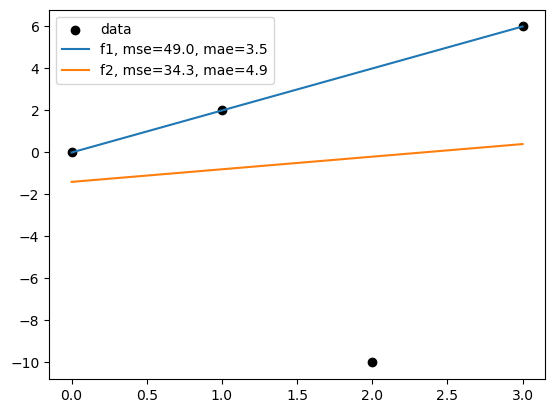

In [30]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.DataFrame({
    "x":np.arange(4),
    "y":[0,2,-10,6]},
)


f1 = lambda x: 2*x
f2 = lambda x: 0.6*x - 1.4

df["f1"] = f1(df["x"])
df["f2"] = f2(df["x"])

# import mse and mae
f1_mse = mean_squared_error(df["y"], df["f1"])
f2_mse = mean_squared_error(df["y"], df["f2"])
f1_mae = mean_absolute_error(df["y"], df["f1"])
f2_mae = mean_absolute_error(df["y"], df["f2"])

# plot the data
plt.scatter(df["x"], df["y"], color='black')
plt.plot(df["x"], df["f1"], label='f1')
plt.plot(df["x"], df["f2"], label='f2')
plt.legend(['data',f'f1, mse={f1_mse:.1f}, mae={f1_mae:.1f}', f'f2, mse={f2_mse:.1f}, mae={f2_mae:.1f}'])


## Detailed Derivation of the Optimal Parameters

The loss function for simple linear regression is given by:

$$L(w, b) = \frac{1}{N} \sum_{i=1}^N ((wx_i + b) - y_i)^2$$

To find the optimal \( w \), we set the partial derivative of \( L \) with respect to \( w \) to zero:

1. Differentiate with respect to \( w \):

$$\frac{\partial L}{\partial w} = \frac{2}{N} \sum_{i=1}^{N} x_i ((wx_i + b) - y_i) = 0$$

Rearrange this equation to get:


$$w \sum_{i=1}^{N} x_i^2 + b N \bar{X} = \sum_{i=1}^{N} x_i y_i\quad\quad(*)$$

2. Derivative with respect to $b$:

$$
\frac{\partial L}{\partial b} = \frac{2}{N} \sum_{i=1}^{N} ((wx_i + b) - y_i) = 0
$$

This simplifies to:

$$
w\sum_{i=1}^{N} x_i + Nb = \sum_{i=1}^{N} y_i
$$

Or, equivalently:

$$
w\bar{X} + b = \bar{Y}
$$


Substitute $b$ back into the equation (*), we get:

$$w \sum_{i=1}^{N} x_i^2 + (\bar{Y} - w \bar{X}) n \bar{X} = \sum_{i=1}^{N} x_i y_i$$

Expanding this:

$$w \sum_{i=1}^{N} x_i^2 + N \bar{Y} \bar{X}- w \bar{X} \sum_{i=1}^{N} x_i = \sum_{i=1}^{N} x_i y_i$$

Rearranging terms

$$w (\sum_{i=1}^{N} x_i^2 - N\bar{X}^2) = \sum_{i=1}^{N} x_i y_i - N\bar{Y}\bar{X}$$

Now, solving for $w$:

$$w = \frac{\sum_{i=1}^{N} x_i y_i - N\bar{Y}\bar{X}}{\sum_{i=1}^{N} x_i^2 - N\bar{X}^2}$$

Recall that $Cov(X,Y) = E[XY]-E[X]E[Y]$, and $Var(X) = E[X^2] - E[X]^2$. 
Divide both the numerator and the denominator by $N$.
We can rewrite the above equation in terms of covariance and variance:
$$w = \frac{Cov(X,Y)}{Var(X)}$$

This is the final expression for $w^*$ in simple linear regression, representing the slope of the best-fit line.